In [151]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path_data = os.path.join(".", "clustering.csv")

import builtins

def print(*args, **kwargs):
    kwargs['sep'] = ''
    return builtins.print(*args, **kwargs)
    
plt.rcParams['figure.figsize'] = (6, 4)

### Lab Task 1

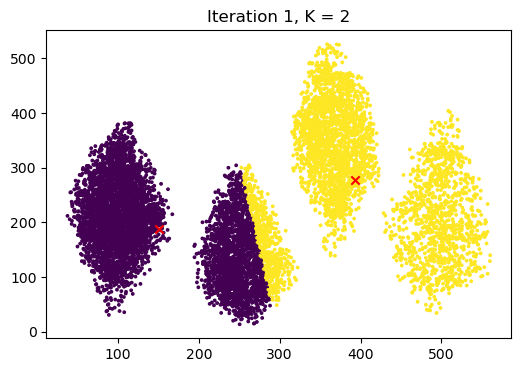

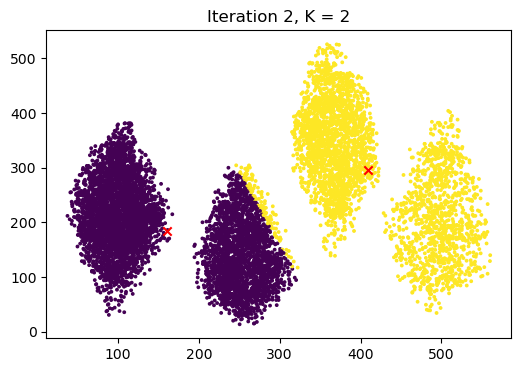

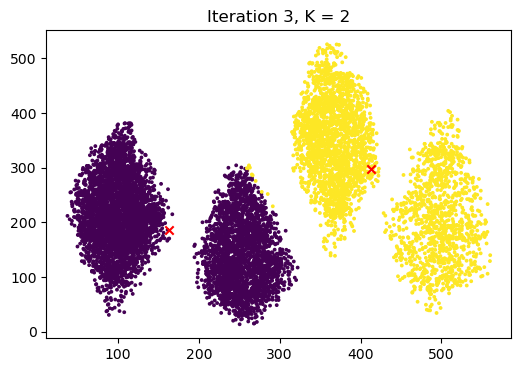

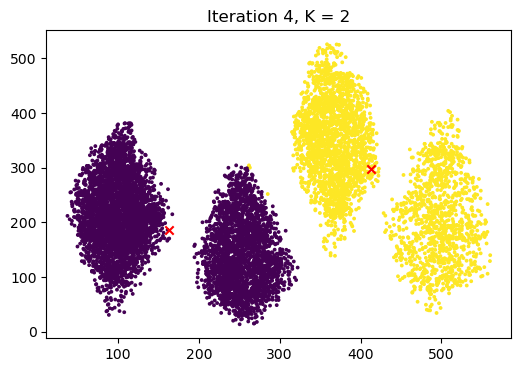

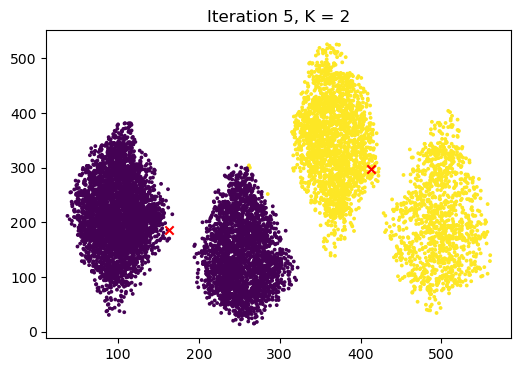

In [75]:
"""
In this task, use the provided dataset. Write the code which performs clustering of the dataset into 2 clusters. The pseudocode for the clustering algorithm is provided as follows:
specify K number of centroids

randomly initialize K number of centroids u
for j = 1:epochs
			for i = 1:m		
c(i) = index of closest cluster to training example
			for k = 1:K
				u(k) = mean of all training examples indexed to k
			plot of x1 and x2 clusters

To determine the index c(i), you will need to write a function that calculates the Euclidean distance between the points in the feature space. This function will be used to find the closest centroid from each training example. After determining the indexes, the cluster centroids themselves are updated by taking the average of the x values. For k-th cluster, the training examples with index k will be averaged. This completes one iteration of clustering after which a scatter plot is made. The iterations are repeated until interesting groups are obtained in the plots. 

Due to the initial randomization of cluster centroids, you may have to repeat the clustering a few times. Also, ensure the random centroids are from within the domain of the feature space.
Your code must generate scatter plots showing the clusters at each iteration. The input values must be colored and marked according to the cluster to which they belong at each iteration. The cluster centroids must also be shown Provide all of the codes and screenshots of the final output. You must include plots from at least 3 different iterations showing the progress of your clustering algorithm.
"""

# Distance function
def compute_euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Load data
data = pd.read_csv(path_data)

# Remove the last column
data = data.iloc[:, :-1]

# Cluster data
def cluster_data(K, epochs, max_range, data, plots=False):
    # Initialize arrays
    u = np.random.rand(K, 2) * max_range
    c = np.zeros(len(data))

    for j in range(epochs):
        # Calculate distances to centroids
        distances = np.linalg.norm(data.values[:, None, :] - u, axis=2)
        # Assign closest centroid index
        c = np.argmin(distances, axis=1)
        # Calculate new centroids
        u = np.array([np.mean(data.iloc[c == k], axis=0) for k in range(K)])

        # Plot
        if plots:
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=c, s=3)
            plt.scatter(u[:, 0], u[:, 1], c="red", marker="x")
            plt.title(f"Iteration {j + 1}, K = {K}")
            plt.show()


cluster_data(2, 5, 500, data, plots=True)

### Lab Task 2

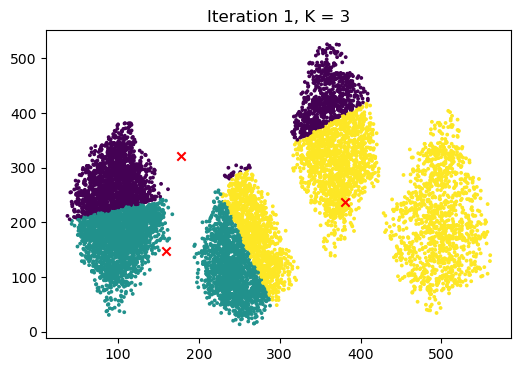

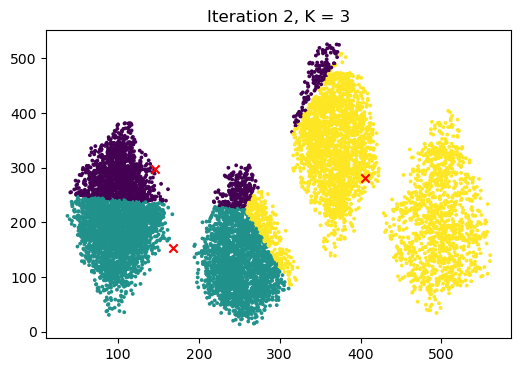

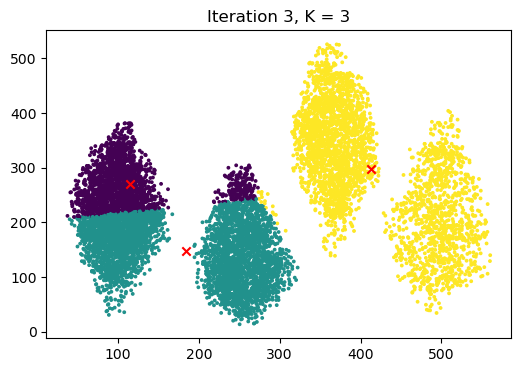

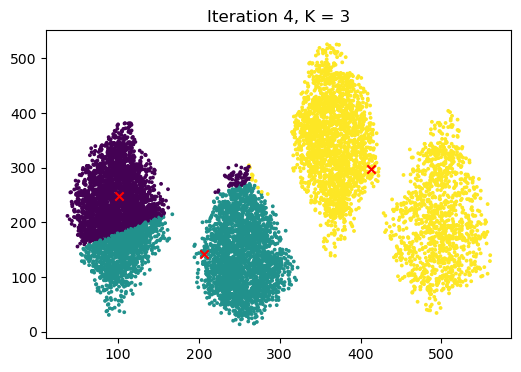

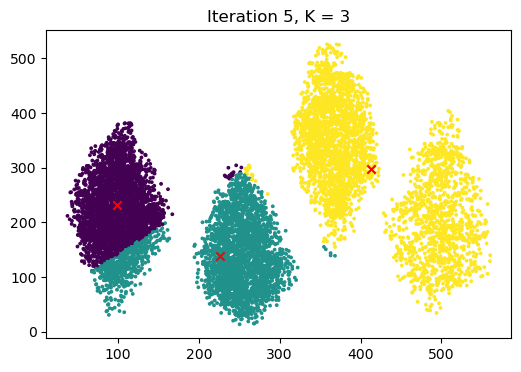

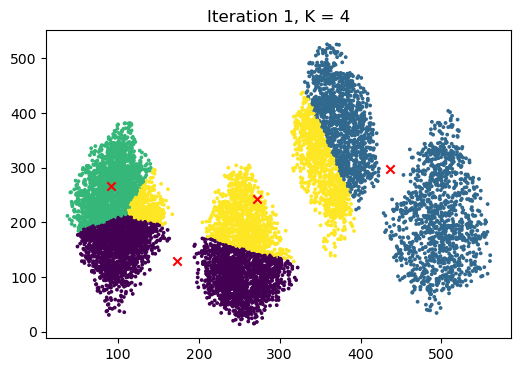

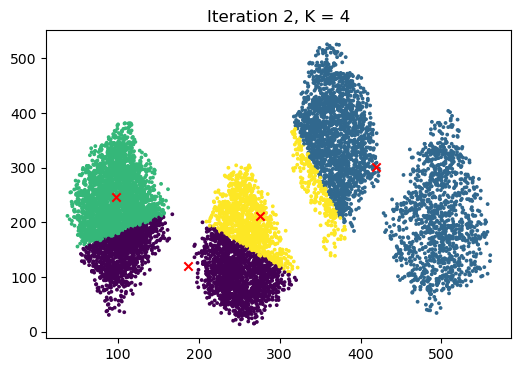

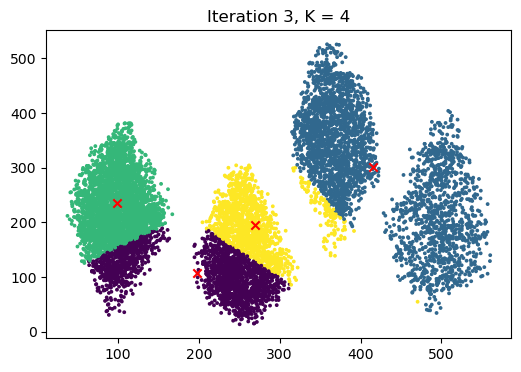

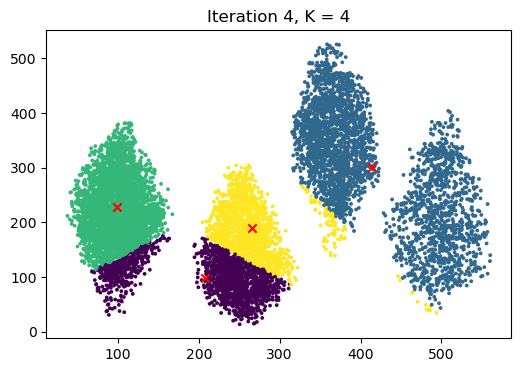

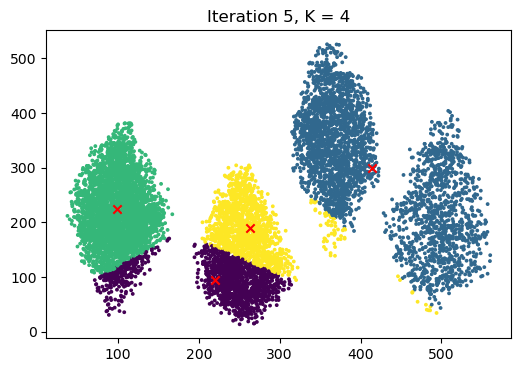

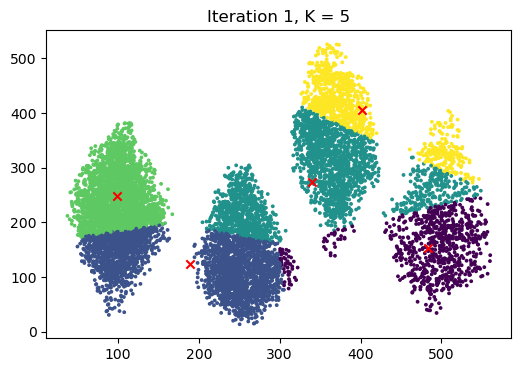

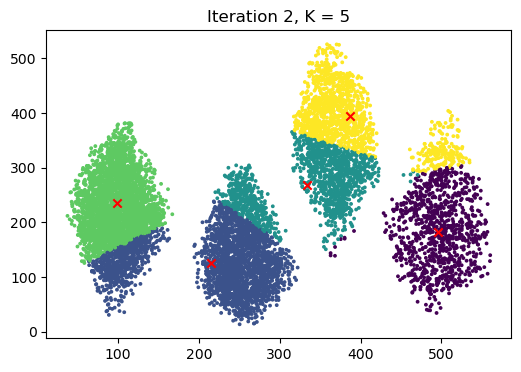

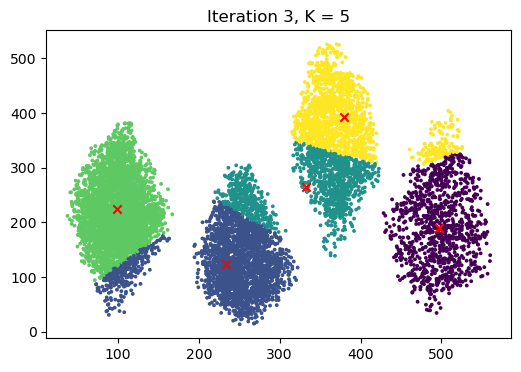

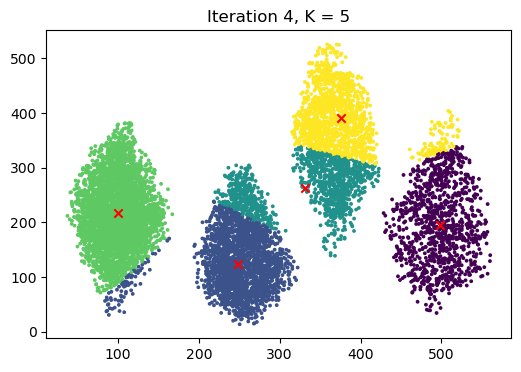

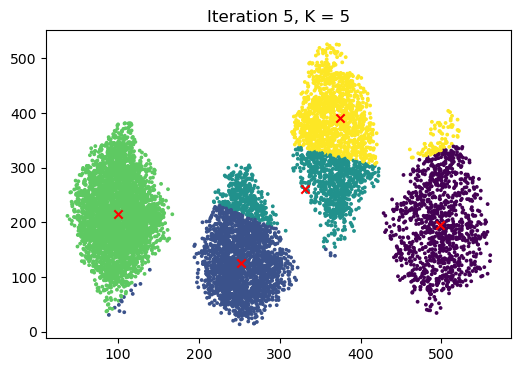

In [76]:
"""
Repeat task 1, however, set value of k = 3, 4 and 5. For every k value, generate at least three plots.
"""

# Load data
data = pd.read_csv(path_data)

# Remove the last column
data = data.iloc[:, :-1]

cluster_data(3, 5, 500, data, plots=True)
cluster_data(4, 5, 500, data, plots=True)
cluster_data(5, 5, 500, data, plots=True)

### Lab Task 3

In [108]:
"""
Load the given dataset into the python program for this task. In this task, you will modify your code so that it performs clustering from
k = 2, 3, 4… 10.
For each k value, perform 20 iterations (epochs) of centroid update before moving to the next value of k. Additionally, at the last iteration, determine the cost for that K-value

Cost_k = 1/m * sum(i=1 to m) l2_norm(x(i) - u(c(i))) ^ 2

for K = 2:10
	randomly initialize K number of centroids u
	for j = 1:epochs
		for i = 1:m		
			compute c(i)
		for k = 1:K
			compute u(k)
	plot of x1 and x2 clusters
	compute cost for current K value
plot of cost and K
Store the costs for each k in a list. After the last iteration of the last cluster, make a plot of k vs. cost. 
"""

# Load data
data = pd.read_csv(path_data)
data = data.iloc[:, :-1]

# Cluster data
def cluster_data(K, epochs, max_range, data, plots=False):
    # Initialize arrays
    u = np.random.rand(K, 2) * max_range
    c = np.zeros(len(data))

    for j in range(epochs):
        # Calculate distances to centroids
        distances = np.linalg.norm(data.values[:, None, :] - u, axis=2)
        # Assign closest centroid index
        c = np.argmin(distances, axis=1)
        # Calculate new centroids
        u = np.array([np.mean(data.iloc[c == k], axis=0) for k in range(K)])

        # Plot
        if plots:
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=c, s=3)
            plt.scatter(u[:, 0], u[:, 1], c="red", marker="x")
            plt.title(f"Iteration {j + 1}, K = {K}")
            plt.show()

    # cost  1 / m * np.sum(np.linalg.norm(x - u, axis=1) ** 2)
    cost = 1 / len(data) * np.sum(np.linalg.norm(data.values - u[c], axis=1) ** 2)
    
    return cost


costs = []

for k in range(2, 11):
    costs.append(cluster_data(k, 20, 500, data))

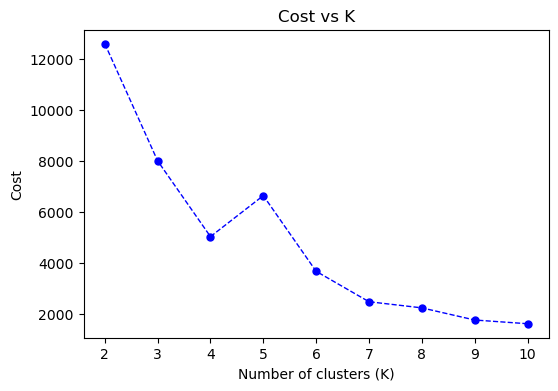

In [109]:
# Customize the plot
plt.plot(
    range(2, 11),
    costs,
    color="blue",
    marker="o",
    linestyle="dashed",
    linewidth=1,
    markersize=5,
)

# Add labels and title
plt.xlabel("Number of clusters (K)")
plt.ylabel("Cost")
plt.title("Cost vs K")

# Show the plot
plt.show()

### Lab Task 4

In [79]:
data = pd.read_csv("custom.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


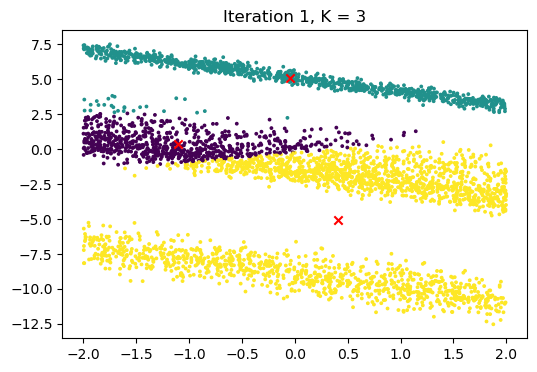

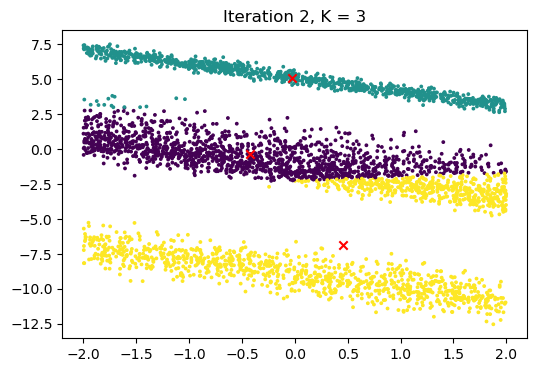

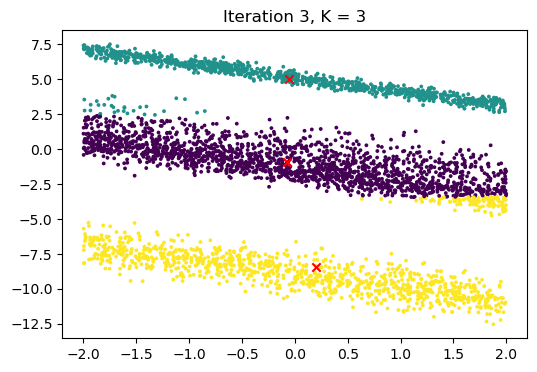

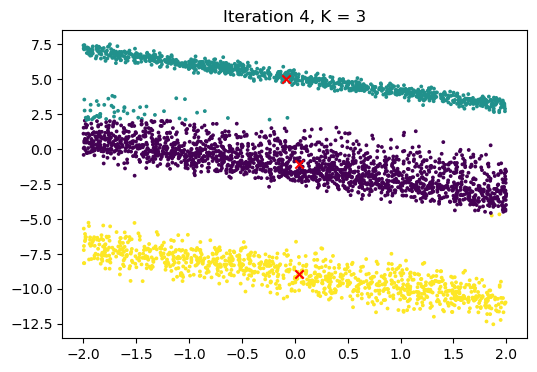

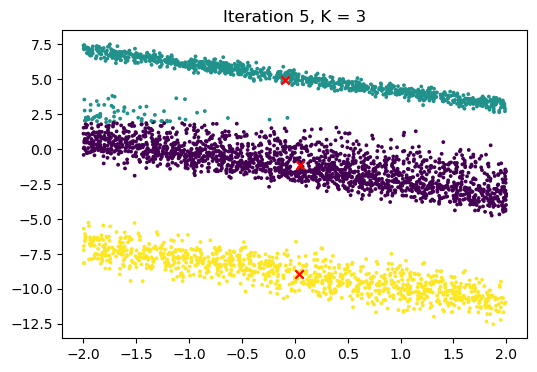

In [162]:
"""
Download your own CSV dataset from the internet (e.g. Kaggle). Your dataset must have at least 500 rows and at least 4 feature columns. Perform clustering of your dataset, showcase the plots and provide explanation.
"""

# Load data
data = pd.read_csv("standard.csv")
data = data[["x1", "x2"]]


# Cluster data
def cluster_data(K, epochs, max_range, data, plots=False):
    # Initialize arrays
    u = np.random.rand(K, 2) * max_range
    c = np.zeros(len(data))

    for j in range(epochs):
        # Calculate distances to centroids
        distances = np.linalg.norm(data.values[:, None, :] - u, axis=2)
        # Assign closest centroid index
        c = np.argmin(distances, axis=1)
        # Calculate new centroids
        u = np.array([np.mean(data.iloc[c == k], axis=0) for k in range(K)])

        # Plot
        if plots:
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=c, s=3)
            plt.scatter(u[:, 0], u[:, 1], c="red", marker="x")
            plt.title(f"Iteration {j + 1}, K = {K}")
            plt.show()

cluster_data(3, 5, np.max(data.iloc[:, 0] + data.iloc[:, 1]) / 2, data, plots=True)

In [207]:
"""
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm in machine learning and data mining. It is particularly useful for identifying clusters of data points in a dataset based on the density of points in the feature space. Unlike k-means or hierarchical clustering, DBSCAN doesn't require specifying the number of clusters beforehand and can discover clusters of arbitrary shapes.

Here is the basic algorithm for DBSCAN:

1.	Input:
•	Dataset: D={x1,x2,...,xn}, where xi is a data point in the feature space.
•	Parameters:
•	Epsilon (ε): The maximum distance between two points for one to be considered as in the neighborhood of the other.
•	MinPts: The minimum number of points required to form a dense region.

Exploring two concepts known as Density Reachability and Density Connectivity helps in understanding these parameters.

Density Reachability, with respect to density, defines a point as reachable from another if it is within a specific distance (epsilon) from it.

Density Connectivity, on the other hand, employs a transitivity-based chaining approach to ascertain if points belong to a specific cluster. For instance, points p and q may be connected if p->r->s->t->q, where a->b signifies that b is in the neighborhood of a.

2.	Algorithm:
•	For each data point p in the dataset D:
•	If p is not visited:
    •	Mark p as visited.
    •	Find all points in the ε-neighborhood of p (including p).
    •	If the number of points in the neighborhood is less than MinPts, mark p as noise.
    •	Otherwise, create a new cluster and add p to the cluster.
    •	Expand the cluster by adding all reachable points in the ε-neighborhood to the cluster.

3.	Output:
•	The algorithm identifies clusters of data points and marks some points as noise if they don't belong to any cluster.
In the algorithm, a point q is considered to be in the ε-neighborhood of p if the distance between p and q is less than or equal to ε. The algorithm classifies points into three categories:
•	Core points: Points with at least MinPts points in their ε-neighborhood.
•	Border points: Points with fewer than MinPts points in their ε-neighborhood but are reachable from a core point.
•	Noise points: Points that are neither core nor border points.
"""

data = pd.read_csv("standard.csv")
data = data[["x1", "x2"]]


# DBSCAN from scratch
def dbscan(data, eps, min_pts):
    # Initialize arrays
    c = np.zeros(len(data))
    visited = np.zeros(len(data))
    clusters = []
    noise = []

    for i in range(len(data)):
        if visited[i]:
            continue

        visited[i] = 1

        # Find all points in the ε-neighborhood of p (including p).
        neighbors = np.linalg.norm(data.values - data.values[i], axis=1) <= eps

        # If the number of points in the neighborhood is less than MinPts, mark p as noise.
        if np.sum(neighbors) < min_pts:
            noise.append(i)
            continue

        # Otherwise, create a new cluster and add p to the cluster.
        clusters.append([i])

        # Expand the cluster by adding all reachable points in the ε-neighborhood to the cluster.
        for j in range(len(data)):
            if neighbors[j]:
                if not visited[j]:
                    visited[j] = 1
                    clusters[-1].append(j)
                if j in noise:
                    noise.remove(j)

    # Assign clusters
    for i, cluster in enumerate(clusters):
        for j in cluster:
            c[j] = i

    return c, clusters, noise


c, clusters, noise = dbscan(data, 1, 2)

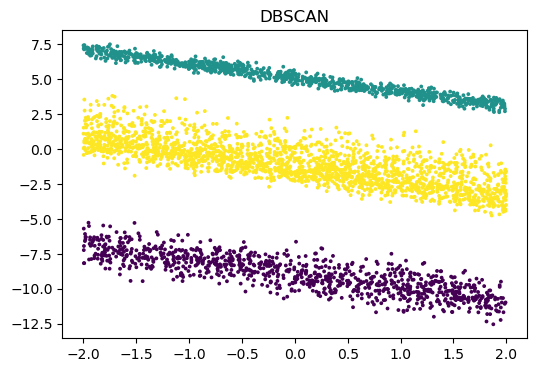

In [208]:
from sklearn.cluster import DBSCAN

# compute DBSCAN
db = DBSCAN(eps=1, min_samples=2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Plot
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, s=3)
plt.title("DBSCAN")
plt.show()